# Data Dictionary
**Variable** Meaning	Levels</br>
**Age**	Age of the employee	</br>
**Attrition**	Whether the employee left in the previous year or not	</br>
**BusinessTravel**	How frequently the employees travelled for business purposes in the last year	</br>
**Department**	Department in company	</br>
**DistanceFromHome**	Distance from home in kms	</br>
**Education**	Education Level</br>
        1 'Below College'
		2 'College'
		3 'Bachelor'
		4 'Master'
		5 'Doctor'</br>
**EducationField**	Field of education	</br>
**EmployeeCount**	Employee count	</br>
**EmployeeNumber**	Employee number/id	</br>
**EnvironmentSatisfaction**	Work Environment Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**Gender**	Gender of employee	</br>
**JobInvolvement**	Job Involvement Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**JobLevel**	Job level at company on a scale of 1 to 5	</br>
**JobRole**	Name of job role in company	</br>
**JobSatisfaction**	Job Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**MaritalStatus**	Marital status of the employee	</br>
**MonthlyIncome**	Monthly income in rupees per month	</br>
**NumCompaniesWorked**	Total number of companies the employee has worked for	</br>
**Over18**	Whether the employee is above 18 years of age or not	</br>
**PercentSalaryHike**	Percent salary hike for last year	</br>
**PerformanceRating**	Performance rating for last year	</br>
        1 'Low'
		2 'Good'
		3 'Excellent'
		4 'Outstanding'</br>
**RelationshipSatisfaction**	Relationship satisfaction level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**StandardHours**	Standard hours of work for the employee	</br>
**StockOptionLevel**	Stock option level of the employee	</br>
**TotalWorkingYears**	Total number of years the employee has worked so far	</br>
**TrainingTimesLastYear**	Number of times training was conducted for this employee last year	</br>
**WorkLifeBalance**	Work life balance level	</br>
        1 'Bad'
		2 'Good'
		3 'Better'
		4 'Best'</br>
**YearsAtCompany**	Total number of years spent at the company by the employee	
**YearsSinceLastPromotion**	Number of years since last promotion	
**YearsWithCurrManager**	Number of years under current manager	

In [30]:
# Common imports
import sqlite3
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [31]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [32]:
conn = sqlite3.connect("data/hr_data.db")
employee_survey = pd.read_sql_query("select * from employee_survey_data", conn)
general_data = pd.read_sql_query("select * from general_data", conn)
manager_survey = pd.read_sql_query("select * from manager_survey_data", conn)
in_time = pd.read_sql_query("select * from in_time", conn)
out_time = pd.read_sql_query("select * from out_time", conn)

all_data = pd.read_sql_query("select *, Case when Attrition ='Yes' then 1 else 0 end as 'Attr' from general_data g join employee_survey_data e on g.EmployeeID=e.EmployeeID join manager_survey_data m on g.EmployeeID=m.EmployeeID Where EnvironmentSatisfaction Not Like 'NA' AND JobSatisfaction Not Like 'NA' AND WorkLifeBalance Not Like 'NA' AND TotalWorkingYears Not Like 'NA' AND NumCompaniesWorked Not Like 'NA'", conn)
all_data['JobSatisfaction'] = all_data['JobSatisfaction'].astype(np.int64)
all_data['WorkLifeBalance'] = all_data['WorkLifeBalance'].astype(np.int64)
all_data['EnvironmentSatisfaction'] = all_data['EnvironmentSatisfaction'].astype(np.int64)

In [33]:
#drop the useless columns:
all_data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1, inplace = True)

In [34]:
all_data.drop_duplicates(keep = 'first',inplace=True) 

In [35]:
all_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [36]:
all_data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
JobInvolvement             False
PerformanceRating          False
Attr                       False
dtype: bool

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 3751
Data columns (total 26 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
BusinessTravel             1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
Gender                     1470 non-null object
JobLevel                   1470 non-null int64
JobRole                    1470 non-null object
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
NumCompaniesWorked         1470 non-null int64
PercentSalaryHike          1470 non-null int64
StockOptionLevel           1470 non-null int64
TotalWorkingYears          1470 non-null int64
TrainingTimesLastYear      1470 non-null int64
YearsAtCompany             1470 non-null int64
YearsSinceLastPromotion    1470 non-null

In [38]:
all_data.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attr
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,2.721769,2.728571,2.761224,2.729932,3.153741,0.161224
std,9.135373,8.106864,1.024165,1.106940,47079.567831,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,1.093082,1.102846,0.706476,0.711561,0.360824,0.367863
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,3.000000,83790.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [39]:
## Monthly salaries are in rupees 'INR'
from forex_python.converter import CurrencyRates

In [40]:
c = CurrencyRates()
c.get_rates('USD')

{'GBP': 0.8208635023,
 'HKD': 7.8367748279,
 'IDR': 14265.0040225261,
 'ILS': 3.4940556003,
 'DKK': 6.6723875927,
 'INR': 70.8098685975,
 'CHF': 0.9760436221,
 'MXN': 19.5496558505,
 'CZK': 22.9972289264,
 'SGD': 1.380262805,
 'THB': 30.7446142844,
 'HRK': 6.6005184589,
 'EUR': 0.8938946992,
 'MYR': 4.1870027711,
 'NOK': 8.8982747832,
 'CNY': 7.0189505676,
 'BGN': 1.7482792527,
 'PHP': 52.0863502279,
 'PLN': 3.8543845535,
 'ZAR': 14.8060248503,
 'CAD': 1.3216233128,
 'ISK': 122.0166264414,
 'BRL': 3.941986234,
 'RON': 4.2281219272,
 'NZD': 1.52614642,
 'TRY': 5.5337445249,
 'JPY': 106.4628586752,
 'RUB': 65.0734781443,
 'KRW': 1213.3011531242,
 'USD': 1.0,
 'AUD': 1.4719764012,
 'HUF': 290.8286403862,
 'SEK': 9.58854027}

In [41]:
ex_rate = c.convert('USD', 'INR', .01)
ex_rate

0.708098685975

In [42]:
all_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [43]:
all_data['MonthlyIncome'].describe()

count      1470.000000
mean      65029.312925
std       47079.567831
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83790.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [44]:
all_data['MonthlyIncomeUSD'] = all_data['MonthlyIncome']*ex_rate
all_data['MonthlyIncomeUSD'].head()

0     92874.223652
1     29662.253955
2    136861.314025
3     58920.891660
4     16583.671226
Name: MonthlyIncomeUSD, dtype: float64

In [45]:
all_data['MonthlyIncomeUSD'].describe()

count      1470.000000
mean      46047.171032
std       33336.980117
min        7144.715741
25%       20612.752749
50%       34831.374363
75%       59331.588898
max      141612.656208
Name: MonthlyIncomeUSD, dtype: float64

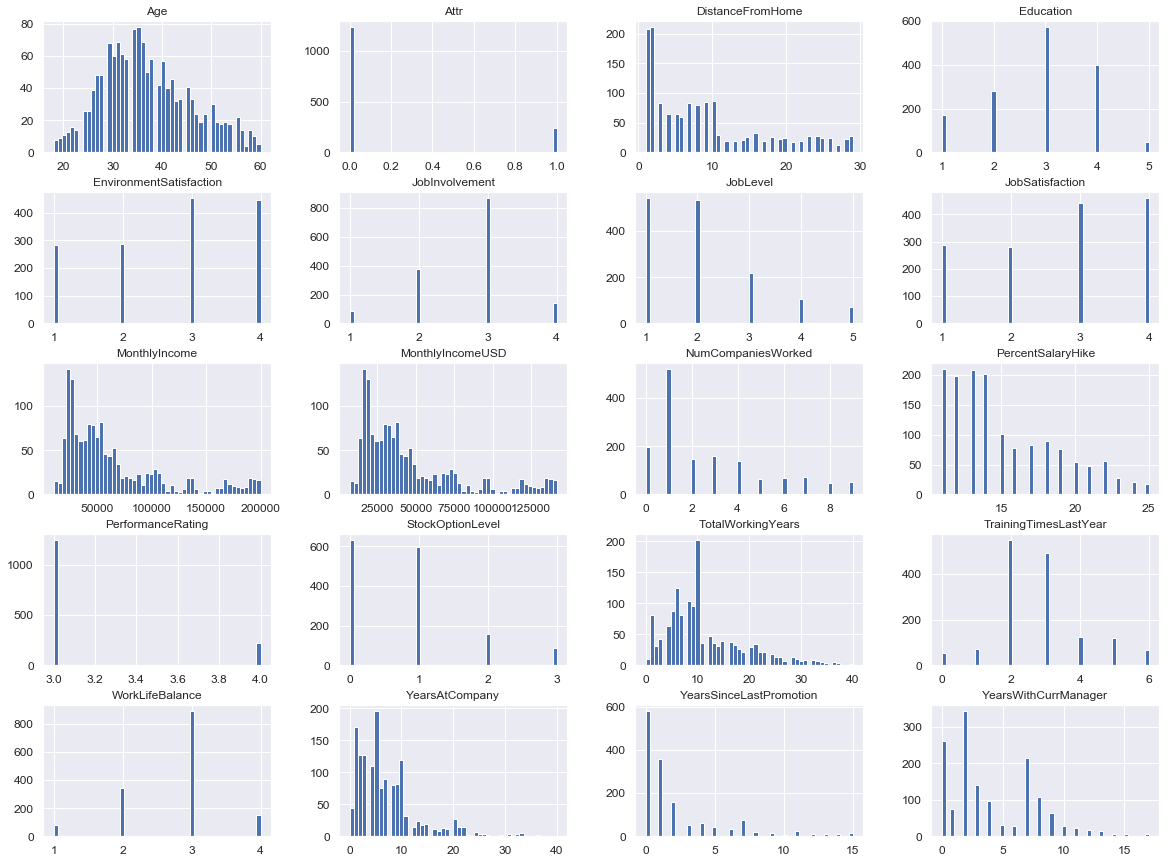

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creates a folder in the current directory called data
createFolder('images')
all_data.hist(bins=50, figsize=(20,15))
plt.savefig('images/general_data.png')
plt.show()

In [50]:
corr_cols = all_data[['Age','Attr','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncomeUSD', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

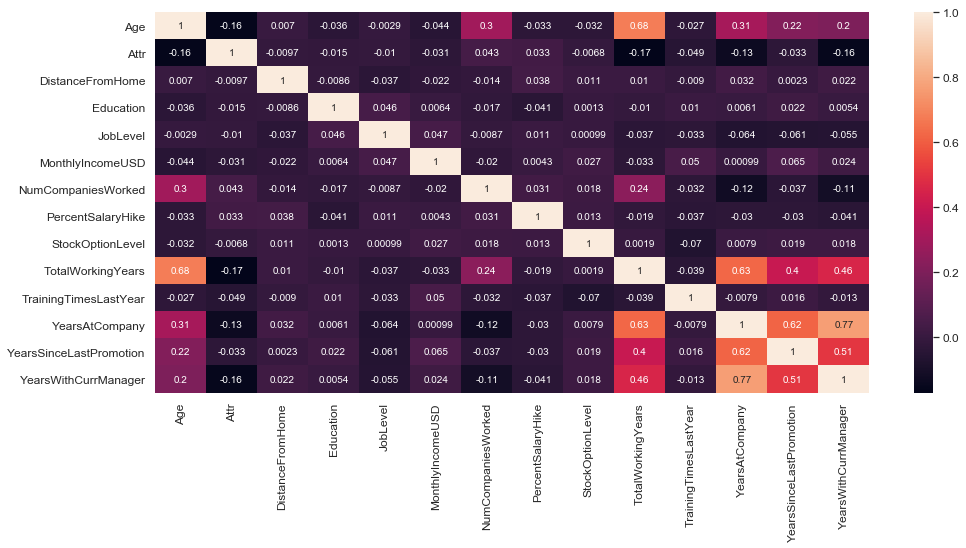

In [51]:
corr = corr_cols.corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [52]:
all_data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [54]:
attrition_rate = (237/1470)
attrition_rate

0.16122448979591836

In [55]:
all_data["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [56]:
all_data["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [57]:
all_data["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [58]:
all_data["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

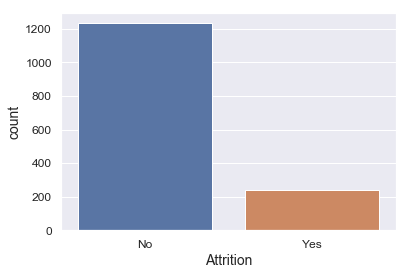

In [59]:
sns.countplot(x = "Attrition",data=all_data)
plt.show()

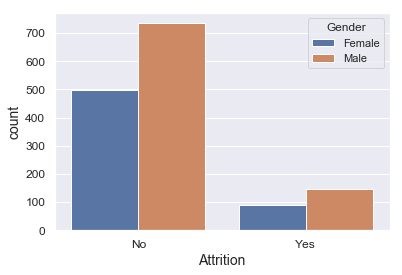

In [60]:
sns.countplot(x = "Attrition",data=all_data,hue="Gender")
plt.show()

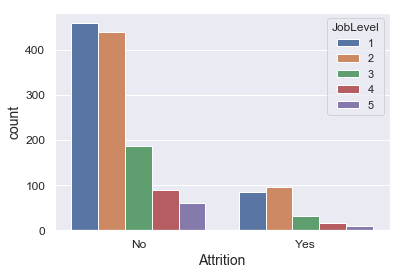

In [61]:
sns.countplot(x = "Attrition",data=all_data,hue="JobLevel")
plt.show()

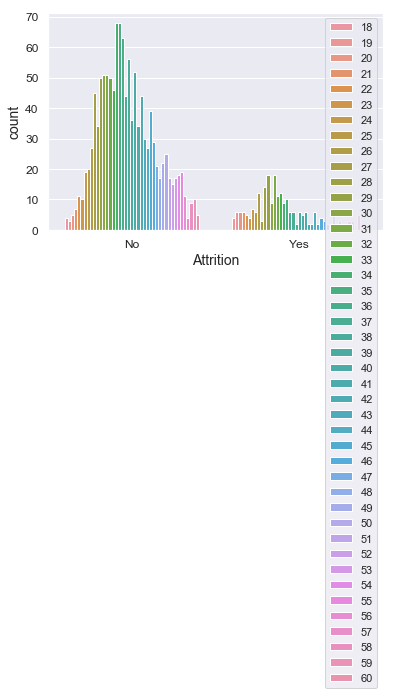

In [62]:
sns.countplot(x = "Attrition",data=all_data,hue="Age")
plt.legend(loc='upper right')
plt.show()

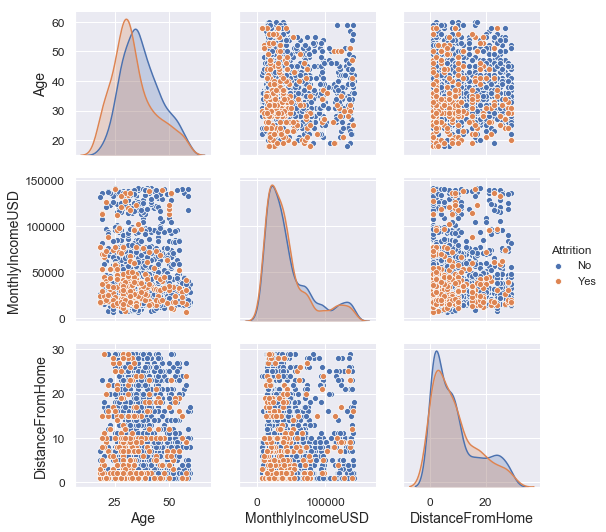

In [63]:
sns.pairplot(all_data[['Age','MonthlyIncomeUSD','DistanceFromHome','Attrition']],hue = 'Attrition')